# Parkinson's Disease - Hybrid Functional Petri Net (HFPN)
This script has implemented the following blocks of the HFPN for PD:
- [x] Cholesterol homeostasis
- [x] Calcium homeotasis
- [x] Energy metabolism
- [x] Lewy bodies formation

Implemented data and parameter optimisation
- [x] Cholesterol homeostasis
- [x] Calcium homeotasis
- [x] Energy metabolism
- [x] Lewy bodies formation
- [ ] ER retraction

### Add your imports

In [1]:
import os
import sys

# Only run this cell once to avoid confusion with directories
# Point this to the directory where HFPN.py is relative to your working directory
cwd = os.getcwd() # Get current working directory
root_folder = os.sep + "team-project"
# Move to 'utils' from current directory position
sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "utils" + os.sep)

# Import HFPN class to work with hybrid functional Petri nets
from hfpn import HFPN

sys.path.insert(0, cwd[:(cwd.index(root_folder)+len(root_folder))] + os.sep + "parkinsons" + os.sep)
# Import initial token, firing conditions and rate functions
from initial_tokens import *
from rate_functions import *
from firing_conditions import *
from visualisation import Analysis

### Initialise an empty HFPN

In [2]:
# Initialize an empty HFPN
pn = HFPN(time_step = 0.01) #unit = s/A.U.

## Define the places by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Cholesterol homeostasis places

In [3]:
pn.add_place(it_p_chol_PM, "p_chol_PM","Chol - perinuclear region", continuous = True)
pn.add_place(it_p_chol_LE, "p_chol_LE", "Chol - late endosome", continuous = True)
pn.add_place(it_p_chol_ER, "p_chol_ER", "Chol - ER", continuous = True)
# pn.add_place(it_p_chol_extra, "p_chol_extra","Chol - extracellular", continuous = True)
pn.add_place(it_p_chol_mito, "p_chol_mito", "Chol - mitochondria", continuous = True)
pn.add_place(it_p_27OHchol_extra, "p_27OHchol_extra","27-OH chol - extracellular", continuous = True)
pn.add_place(it_p_27OHchol_intra, "p_27OHchol_intra","27-OH chol - intracellular", continuous = True)
pn.add_place(it_p_ApoEchol_extra, "p_ApoEchol_extra","ApoE - extracellular", continuous = True)
pn.add_place(it_p_ApoEchol_EE, "p_ApoEchol_EE","ApoE - Early endosome", continuous = True)
pn.add_place(it_p_7HOCA, "p_7HOCA","7-HOCA", continuous = True)
pn.add_place(it_p_preg,place_id="p_preg", label="Pregnenolon", continuous=True)
pn.add_place(it_p_24OHchol_extra,place_id="p_24OHchol_extra", label="24OHchol extra", continuous=True)
pn.add_place(it_p_24OHchol_intra,place_id="p_24OHchol_intra", label="24OHchol intra", continuous=True)

# PD specific places in cholesterol homeostasis
pn.add_place(it_p_GBA1, "p_GBA1","GBA1", continuous = False)
pn.add_place(it_p_ABCGA1, "p_ABCGA1", "ABG(C/G)A1", continuous = False)
pn.add_place(it_p_SNCA_act_extra, "p_SNCA_act_extra","a-synuclein - extracellular", continuous = True)
pn.add_place(it_p_SNCAApoEchol_extra, "p_SNCAApoEchol_extra","a-synuclein-ApoE complex - extracellular", continuous = True)
pn.add_place(it_p_SNCAApoEchol_intra, "p_SNCAApoEchol_intra","a-synuclein-ApoE complex - intracellular", continuous = True)

### Energy metabolism places

In [4]:
pn.add_place(it_p_ROS_mito, "p_ROS_mito", "ROS - mitochondria", continuous = True)
pn.add_place(it_p_H2O_mito, "p_H2O_mito", "H2O - mitochondria", continuous = True)
pn.add_place(it_p_reduc_mito, "p_reduc_mito", "Reducing agents - mitochondria", continuous = True)
pn.add_place(it_p_cas3, "p_cas3","caspase 3 - mitochondria", continuous = True)
pn.add_place(it_p_DJ1, "p_DJ1","DJ1 mutant", continuous = True)


### Calcium homeostasis places

In [5]:
pn.add_place(it_p_Ca_cyto, "p_Ca_cyto", "Ca - cytosole", continuous = True)
pn.add_place(it_p_Ca_mito, "p_Ca_mito","Ca - mitochondria", continuous = True)
pn.add_place(it_p_Ca_ER, "p_Ca_ER", "Ca - ER", continuous = True)
pn.add_place(it_p_ADP, "p_ADP","ADP - Calcium ER import", continuous = True)
pn.add_place(it_p_ATP, "p_ATP","ATP - Calcium ER import", continuous = True)

# Discrete on/of-switches calcium pacemaking

pn.add_place(1, "p_Ca_extra", "on1 - Ca - extracellular", continuous = False)
pn.add_place(0, "p_on2","on2", continuous = False)
pn.add_place(0, "p_on3","on3", continuous = False)
pn.add_place(0, "p_on4","on4", continuous = False)

### Lewy bodies pathology places

In [6]:
pn.add_place(it_p_SNCA_act, "p_SNCA_act","SNCA - active", continuous = True)
pn.add_place(it_p_VPS35, "p_VPS35", "VPS35", continuous = True)
pn.add_place(it_p_SNCA_inact, "p_SNCA_inact", "SNCA - inactive", continuous = True)
pn.add_place(it_p_SNCA_olig, "p_SNCA_olig", "SNCA - Oligomerised", continuous = True)
pn.add_place(it_p_LB, "p_LB", "Lewy body", continuous = True)
pn.add_place(it_p_Fe2, "p_Fe2", "Fe2 iron pool", continuous = True)

### Late endosome pathology places


In [7]:
pn.add_place(it_p_LRRK2_mut, "p_LRRK2_mut","LRRK2 - mutated", continuous = True)
# Monomeric RTN3 (cycling between axonal and perinuclear regions)
pn.add_place(it_p_RTN3_axon, place_id="p_RTN3_axon", label="monomeric RTN3 (axonal)", continuous=True)
pn.add_place(it_p_RTN3_PN, place_id="p_RTN3_PN", label="monomeric RTN3 (perinuclear)", continuous=True)

# HMW RTN3 (cycling between different cellular compartments)
pn.add_place(it_p_RTN3_HMW_cyto, place_id="p_RTN3_HMW_cyto", label="HMW RTN3 (cytosol)", continuous=True)
pn.add_place(it_p_RTN3_HMW_auto, place_id="p_RTN3_HMW_auto", label="HMW RTN3 (autophagosome)", continuous=True)
pn.add_place(it_p_RTN3_HMW_lyso, place_id="p_RTN3_HMW_lyso", label="HMW RTN3 (degraded in lysosome)", continuous=True)
pn.add_place(it_p_RTN3_HMW_dys1, place_id="p_RTN3_HMW_dys1", label="HMW RTN3 (type I/III dystrophic neurites)", continuous=True)
pn.add_place(it_p_RTN3_HMW_dys2, place_id="p_RTN3_HMW_dys2", label="HMW RTN3 (type II dystrophic neurites)", continuous=True)

# Two places that are NOT part of this subpathway, but are temporarily added for establishing proper connections
# They will be removed upon merging of subpathways
pn.add_place(it_p_tau, place_id="p_tau", label = "Unphosphorylated tau", continuous = True)
pn.add_place(it_p_tauP, place_id="p_tauP", label = "Phosphorylated tau", continuous = True)

## Define the transitions by module
Note - if a transition links two modules, put the transition under the module that contains the input places

### Cholesterol homeostasis transitions 

### Calcium homeostasis transitions

In [8]:
pn.add_transition_with_speed_function(
                    transition_id = 't_Ca_imp',
                    label = 'L-type Ca channel',
                    input_place_ids = ['p_Ca_extra'],
                    firing_condition = fc_t_Ca_imp,
                    reaction_speed_function = r_t_Ca_imp,
                    consumption_coefficients = [0], # Need to review this 
                    output_place_ids = ['p_Ca_cyto'],         
                    production_coefficients = [1]) # Need to review this 


pn.add_transition_with_speed_function(
                    transition_id = 't_mCU',
                    label = 'Ca import into mitochondria via mCU',
                    input_place_ids = ['p_Ca_cyto','p_Ca_mito'],
                    firing_condition = fc_t_mCU,
                    reaction_speed_function = r_t_mCU,
                    consumption_coefficients = [1,0], 
                    output_place_ids = ['p_Ca_mito'],         
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_MAM',
                    label = 'Ca transport from ER to mitochondria',
                    input_place_ids = ['p_Ca_ER','p_Ca_mito'],
                    firing_condition = fc_t_MAM,
                    reaction_speed_function = r_t_MAM,
                    consumption_coefficients = [1,0], 
                    output_place_ids = ['p_Ca_mito'],         
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_RyR_IP3R',
                    label = 'Ca export from ER',
                    input_place_ids = ['p_Ca_extra','p_Ca_ER'],
                    firing_condition = fc_t_RyR_IP3R,
                    reaction_speed_function = r_t_RyR_IP3R,
                    consumption_coefficients = [0,1], 
                    output_place_ids = ['p_Ca_cyto'],         
                    production_coefficients = [1]) 

pn.add_transition_with_speed_function(
                    transition_id = 't_SERCA',
                    label = 'Ca import to ER',
                    input_place_ids = ['p_Ca_cyto','p_ATP'],
                    firing_condition = fc_t_SERCA,
                    reaction_speed_function = r_t_SERCA,
                    consumption_coefficients = [1,0], #!!!!! Need to review this 0 should be 1
                    output_place_ids = ['p_Ca_ER','p_ADP'],         
                    production_coefficients = [1,1]) # Need to review this

pn.add_transition_with_speed_function(
                    transition_id = 't_NCX_PMCA',
                    label = 'Ca efflux to extracellular space',
                    input_place_ids = ['p_Ca_cyto','p_on3'],
                    firing_condition = lambda a: a['p_on3']==1,
                    reaction_speed_function = r_t_NCX_PMCA,
                    consumption_coefficients = [1,0], 
                    output_place_ids = [],         
                    production_coefficients = [])
pn.add_transition_with_speed_function(
                    transition_id = 't_mNCLX',
                    label = 'Ca export from mitochondria via mNCLX',
                    input_place_ids = ['p_Ca_mito','p_LRRK2_mut'],
                    firing_condition = fc_t_mNCLX,
                    reaction_speed_function = r_t_mNCLX,
                    consumption_coefficients = [1,0], 
                    output_place_ids = ['p_Ca_cyto'],         
                    production_coefficients = [1]) 

# Discrete on/of-switches calcium pacemaking

pn.add_transition_with_speed_function(
                    transition_id = 't_A',
                    label = 'A',
                    input_place_ids = ['p_on4'],
                    firing_condition = lambda a: a['p_on4']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_Ca_extra'],         
                    production_coefficients = [1],
                    delay=0.5) 
pn.add_transition_with_speed_function(
                    transition_id = 't_B',
                    label = 'B',
                    input_place_ids = ['p_Ca_extra'],
                    firing_condition = lambda a: a['p_Ca_extra']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_on2'],         
                    production_coefficients = [1],
                    delay=0.5) 
pn.add_transition_with_speed_function(
                    transition_id = 't_C',
                    label = 'C',
                    input_place_ids = ['p_on2'],
                    firing_condition = lambda a: a['p_on2']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_on3'],         
                    production_coefficients = [1],
                    delay=0) 
pn.add_transition_with_speed_function(
                    transition_id = 't_D',
                    label = 'D',
                    input_place_ids = ['p_on3'],
                    firing_condition = lambda a: a['p_on3']==1,
                    reaction_speed_function = lambda a: 1,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_on4'],         
                    production_coefficients = [1],
                    delay=0.5)

In [9]:
# Link to energy metabolism in that it needs ATP replenishment
pn.add_transition_with_mass_action(
                    transition_id = 't_NaK_ATPase',
                    label = 'NaK ATPase',
                    rate_constant =  k_t_NaK_ATPase,
                    input_place_ids = ['p_ATP', 'p_on3'],
                    firing_condition = lambda a: a['p_on3']==1,
                    consumption_coefficients = [1,0], 
                    output_place_ids = ['p_ADP'],         
                    production_coefficients = [1])

### Lewy bodies pathology transitions

### Energy metabolism transitions

In [10]:
pn.add_transition_with_speed_function(
                    transition_id = 't_ATP_hydro_mito',
                    label = 'ATP hydrolysis in mitochondria',
                    input_place_ids = ['p_ATP'],
                    firing_condition = fc_t_ATP_hydro_mito,
                    reaction_speed_function = r_t_ATP_hydro_mito,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_ADP'],         
                    production_coefficients = [1])
pn.add_transition_with_speed_function(
                    transition_id = 't_ROS_metab',
                    label = 'ROS neutralisation',
                    input_place_ids = ['p_ROS_mito','p_chol_mito','p_LB','p_DJ1'],
                    firing_condition = fc_t_ROS_metab,
                    reaction_speed_function = r_t_ROS_metab,
                    consumption_coefficients = [1,0,0,0], 
                    output_place_ids = ['p_H2O_mito'],         
                    production_coefficients = [1])
# #Link of krebs to calcium homeostasis
pn.add_transition_with_speed_function(
                    transition_id = 't_krebs',
                    label = 'Krebs cycle',
                    input_place_ids = ['p_ADP','p_Ca_mito'],
                    firing_condition = fc_t_krebs,
                    reaction_speed_function = r_t_krebs,
                    consumption_coefficients = [1,0], # Need to review this
                    output_place_ids = ['p_reduc_mito','p_ATP'],         
                    production_coefficients = [4,1])
#Link of ETC to calcium and cholesterol
pn.add_transition_with_speed_function(
                    transition_id = 't_ETC',
                    label = 'Electron transport chain',
                    input_place_ids = ['p_reduc_mito', 'p_ADP', 'p_Ca_mito', 'p_chol_mito','p_ROS_mito'],
                    firing_condition = fc_t_ETC,
                    reaction_speed_function = r_t_ETC,
                    consumption_coefficients = [22/3,22,0,0,0], # Need to review this
                    output_place_ids = ['p_ATP', 'p_ROS_mito'],         
                    production_coefficients = [22,0.005])#0.02*2 / 2*22 / 3])


# # Output transitions: Cas3 for apoptosis
pn.add_transition_with_speed_function(
                    transition_id = 't_mito_dysfunc',
                    label = 'Mitochondrial complex 1 dysfunction',
                    input_place_ids = ['p_ROS_mito'],
                    firing_condition = fc_t_mito_dysfunc,
                    reaction_speed_function = r_t_mito_dysfunc,
                    consumption_coefficients = [1], 
                    output_place_ids = ['p_cas3'],         
                    production_coefficients = [1])
pn.add_transition_with_speed_function(
                    transition_id = 't_cas3_inact',
                    label = 'Caspase 3 degredation',
                    input_place_ids = ['p_cas3'],
                    firing_condition = fc_t_cas3_inact,
                    reaction_speed_function = r_t_cas3_inact,
                    consumption_coefficients = [1], # Need to review this
                    output_place_ids = [],         
                    production_coefficients = [])

### Late endosome pathology transitions


## Run the network and plot a time evolution of the system

In [11]:
pn.reset_network()

In [12]:
pn.run_many_times(number_runs=1, number_time_steps=50000) 
analysis = Analysis(pn)

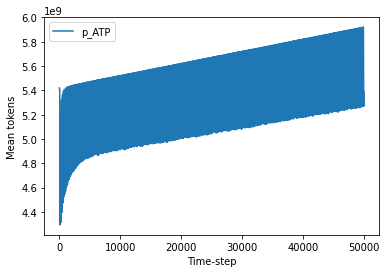

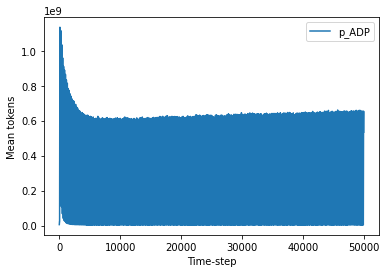

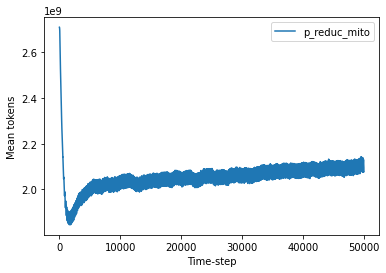

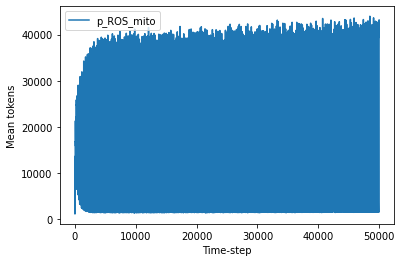

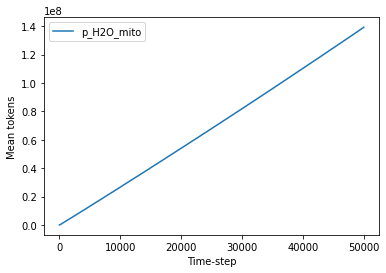

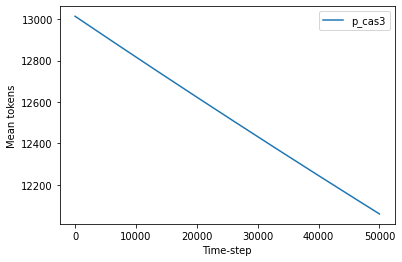

In [13]:
#PLOTTING ENERGY METABOLISM
analysis.mean_run_tokens_over_time(['p_ATP'])
analysis.mean_run_tokens_over_time(['p_ADP'])
analysis.mean_run_tokens_over_time(['p_reduc_mito'])
analysis.mean_run_tokens_over_time(['p_ROS_mito'])
analysis.mean_run_tokens_over_time(['p_H2O_mito'])
analysis.mean_run_tokens_over_time(['p_cas3'])

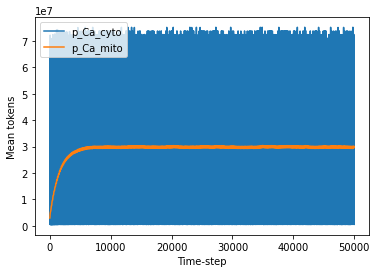

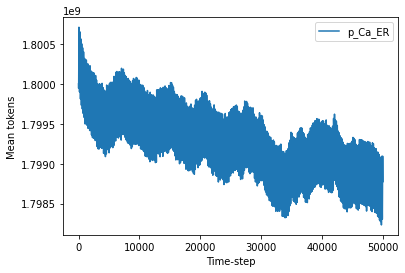

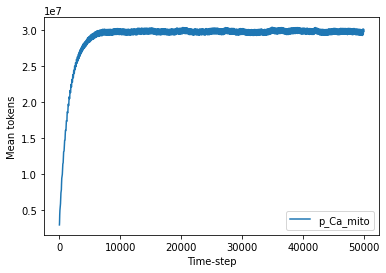

In [14]:
#PLOTTING CALCIUM 
analysis.mean_run_tokens_over_time(['p_Ca_mito','p_Ca_cyto'])
analysis.mean_run_tokens_over_time(['p_Ca_ER'])
analysis.mean_run_tokens_over_time(['p_Ca_mito'])